In [2]:
import pandas as pd
df = pd.read_csv (r"C:\Users\alexa\OneDrive\Documents\Babson\Advanced_Programming\MOD 5\homes.csv")

In [3]:
print(df.head())

   Sell   "List"   "Living"   "Rooms"   "Beds"   "Baths"   "Age"   "Acres"  \
0   142      160         28        10        5         3      60      0.28   
1   175      180         18         8        4         1      12      0.43   
2   129      132         13         6        3         1      41      0.33   
3   138      140         17         7        3         1      22      0.46   
4   232      240         25         8        4         3       5      2.05   

    "Taxes"  
0      3167  
1      4033  
2      1471  
3      3204  
4      3613  


In [4]:
print(df.shape)

(50, 9)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB
None


In [6]:
print(df.describe())

             Sell      "List"   "Living"    "Rooms"     "Beds"    "Baths"  \
count   50.000000   50.000000  50.000000  50.000000  50.000000  50.000000   
mean   170.360000  178.340000  21.120000   8.060000   3.820000   1.860000   
std     72.755885   79.382723   8.351072   1.284285   0.690755   0.756199   
min     87.000000   90.000000  10.000000   5.000000   3.000000   1.000000   
25%    135.000000  140.000000  17.000000   7.000000   3.000000   1.000000   
50%    152.000000  160.000000  20.000000   8.000000   4.000000   2.000000   
75%    182.250000  190.000000  22.750000   9.000000   4.000000   2.000000   
max    567.000000  625.000000  64.000000  12.000000   6.000000   4.000000   

            "Age"    "Acres"       "Taxes"  
count   50.000000  50.000000     50.000000  
mean    30.220000   1.020600   3706.100000  
std     30.962314   1.191496   1579.915268  
min      2.000000   0.220000   1445.000000  
25%     12.250000   0.382500   3107.000000  
50%     24.500000   0.550000   3490.

# Data Set Description
The data set includes data about house sale listings. It includes the following<br>**Sell:** final sale prince in thousands of dollars (I assume)<br>**List:** list price in thousands of dollars ( I assume)<br>**Living:** square footage in hundreds (I assume)<br>**Rooms:** number of rooms<br>**Beds:** number of bedrooms <br>**Baths:** number of bathrooms<br>**Age:** the age of the house in years<br>**Acres:** the size of the lot in acres <br>**Taxes:** annual property taxes in dollars

# Correleation Matrix

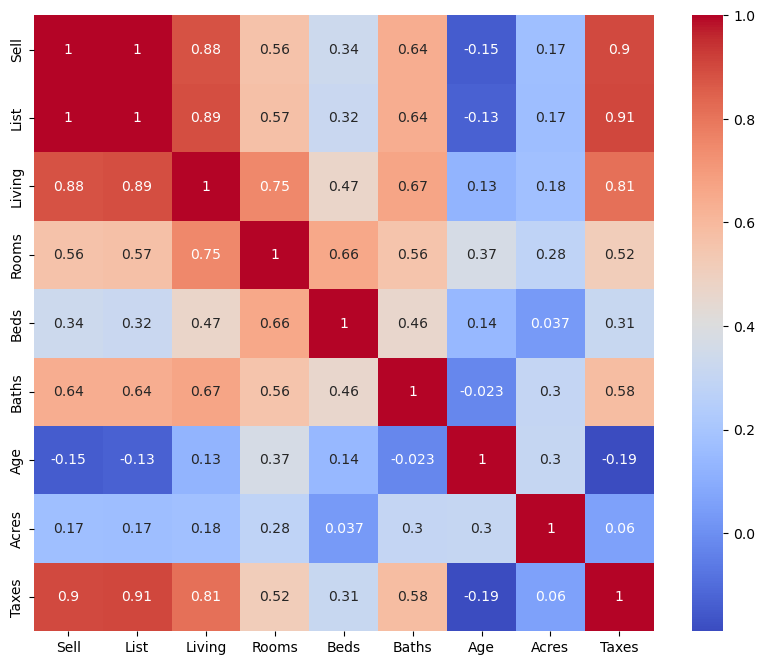

In [34]:
matrix = df.corr()

import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sb.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

Correlation matrix is used to find relationships between different variables. The matrix compares each variable to all other variables, including it self, and calculates correlation score. Scores at or near 1 have high correlation and thus the variables have a strong relationship. Whereas scores near 0 have low correlations and have a weak relationship. 

This matrix shows a very strong relationship between list and sale price, along with price and taxes. Another strong correlation includes price and living space. Age has the weakest correlation with all other variables, but especially taxes.

# Histograms

In [30]:
df[['Sell', 'List', 'Age']].hist(bins=30, figsize=(15, 10))
plt.show()

KeyError: "['List', 'Age'] not in index"

# Fixing Column Headers

In [31]:
print(df.columns)

Index(['Sell', '"List"', '"Living"', '"Rooms"', '"Beds"', '"Baths"', '"Age"',
       '"Acres"', '"Taxes"'],
      dtype='object')


In [32]:
df.columns = df.columns.str.replace('"', '', regex=False)

print(df.columns)

Index(['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres',
       'Taxes'],
      dtype='object')


# Retrying Historgrams

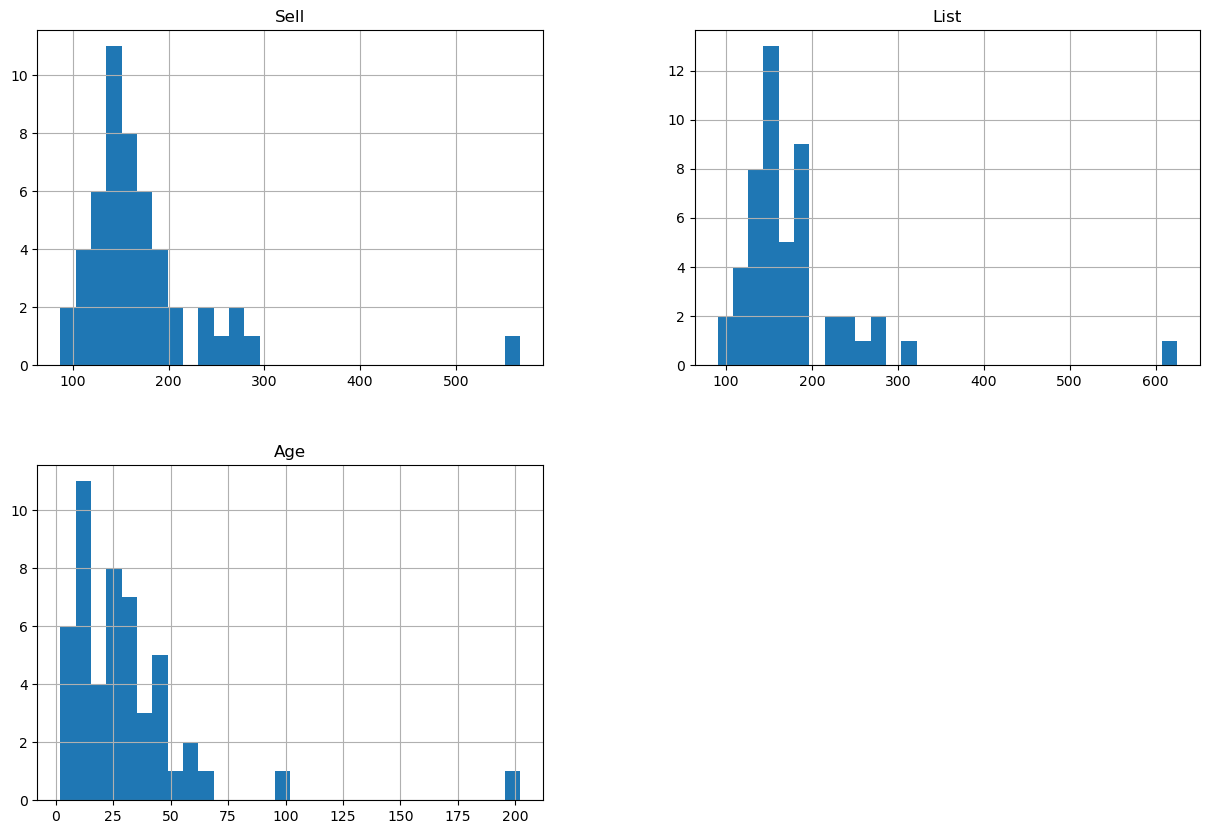

In [33]:
df[['Sell', 'List', 'Age']].hist(bins=30, figsize=(15, 10))
plt.show()

Histograms can visualize the distribution of the data and help identify outliers. The histograms for sell price, list price, and age all show as right-skewed. There is an outlier far to the right of the other values that is distorting the normalcy of the distributions.

# Scatter Plot

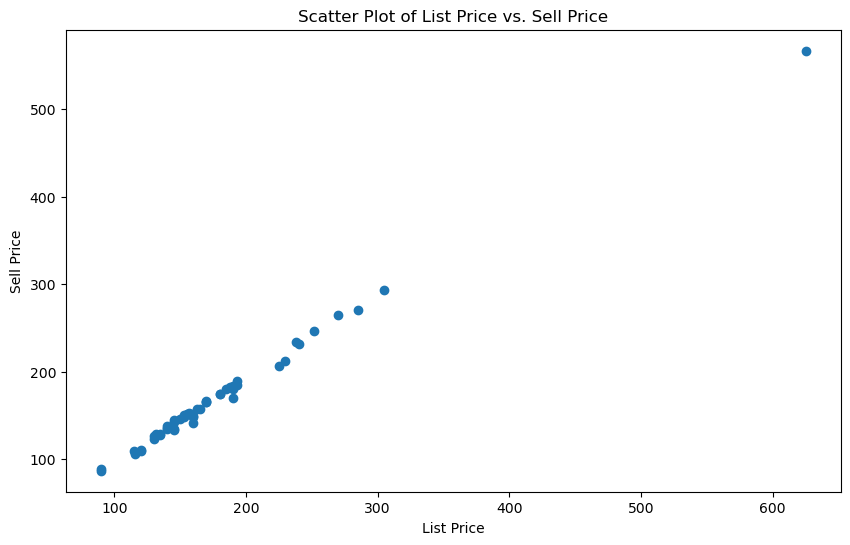

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['List'], df['Sell'])
plt.xlabel('List Price')
plt.ylabel('Sell Price')
plt.title('Scatter Plot of List Price vs. Sell Price')
plt.show()

Scatter plots help to visualize the re;ation ship between two variables. In this plot, sales price and list price are plotted against each other. With the axis being the same scale. It shoes that list and sale price are closely related as there are no points with a significantly different list price compared to sell price.

# Linear Regression (Taxes vs Sell)

Intercept: 16.87187910246172
Slope: 0.04141499713918629
R-squared: 0.8088101825924694


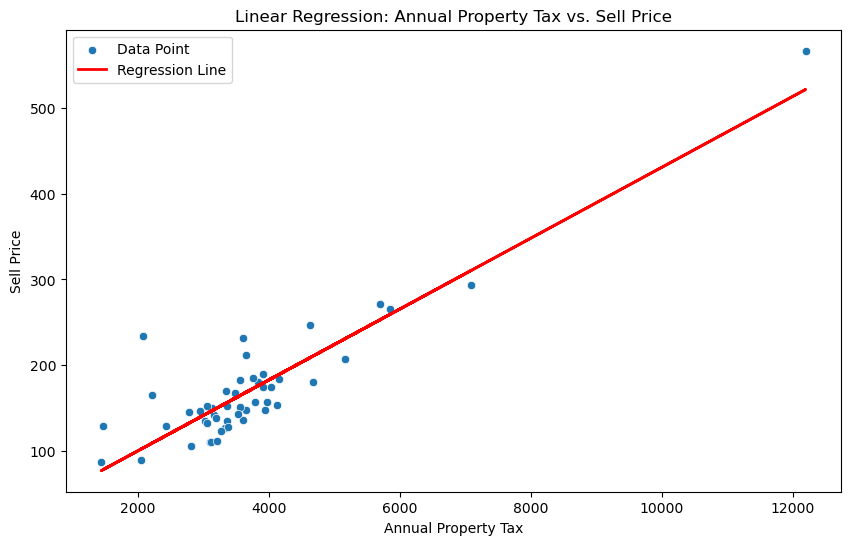

In [53]:
X = df[['Taxes']]
y = df['Sell']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"R-squared: {r_squared}")

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sb.scatterplot(x='Taxes', y='Sell', data=df, label='Data Point')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Annual Property Tax')
plt.ylabel('Sell Price')
plt.title('Linear Regression: Annual Property Tax vs. Sell Price')
plt.legend()
plt.show()

The regression shows that annual taxes are a decent predictor of sell price. The regression has an R-square value of 0.81, so 81% of the variability in the dependent variable (sell price) can be explained by the independent variable. This makes sense, since taxes are tied to property value, so a property with higher taxes should correlate to higher value.

# Linear Regression (Living vs Sell)

Intercept: 8.553141679932565
Slope: 7.661309579548647
R-squared: 0.7733111192235564


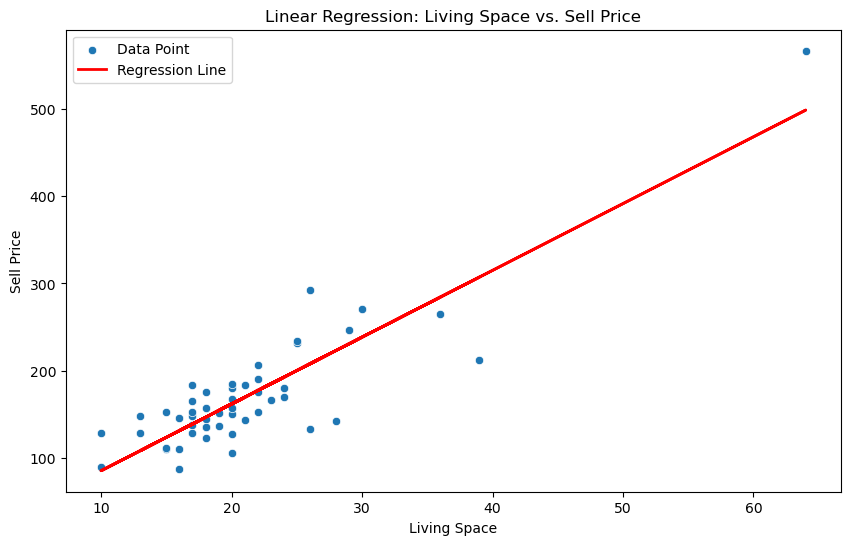

In [54]:
X = df[['Living']]
y = df['Sell']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"R-squared: {r_squared}")

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sb.scatterplot(x='Living', y='Sell', data=df, label='Data Point')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Living Space')
plt.ylabel('Sell Price')
plt.title('Linear Regression: Living Space vs. Sell Price')
plt.legend()
plt.show()

This model is not as good as the taxes model, since it has a lower R-square of 0.77. Linear regression does have some limitations, there is an assumption that the data is linear or close to it. If the data is not close to linear, then the model will be a poor predictor of values. Also linear regression assumes a normal distribution, so it is sensitive to outliers.